In [2]:
#W3D4  road project
import numpy as np
import matplotlib.animation as animation
import seaborn
import statistics as st
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
car = []
diff_bt_cars = []
speeds = []
avg_speed = 0

#initialize cars
for i in range(30):
    car.append([0,2,(12+(7*i))])                 # [ speed, accel, loc ]

num_cars = len(car)


In [4]:
def plot_it(x,y):
    plt.title('Car Traffic Simulation (# of cars = 30)')
    plt.xlabel('Distance bt Cars')
    plt.ylabel('Velocity (km/h)')
    plt.xlim((0, 100))
    plt.ylim((0, 34))
    plt.scatter(x, y, marker='s', cmap='set1', alpha=0.5)
    plt.show()


In [5]:
def plot_them():
    for i in range(1,num_cars):
        diff_bt_cars.append(car[i][2] - car[i-1][2] - 4)
        speeds.append(car[i][0])


In [6]:
def averages_graph(avgs_list):
    plt.title('Average Speeds')
    plt.hist(avgs_list)
    plt.show()



In [7]:
 def std_dev(avgs_list):
    plt.hist(avgs_list)
    mean = st.mean(avgs_list)
    stdev = st.stdev(avgs_list)
    ymin, ymax = plt.ylim()

    plt.vlines(mean, ymin, ymax, color='red')
    plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
    plt.show()

In [8]:
def print_them():
    print("\n"*65)
    spaces = car[0][2]
    print(' '*spaces, end='')                   #print FIRST car
    print('0'*6, end='')

    for i in range(1,num_cars):
        spaces = car[i][2] - car[i-1][2] - 5    #print spaces
        print(' '*spaces, end='')
        if i < 10:
            print(str(i)*6, end='')
        else:                                   #print car x
            print(str(i)*3, end='')

    spaces = car[29][2] - car[28][2] - 5    #print spaces
    print(' '*spaces, end='')
    print('30'*3)


In [9]:
def calc_averages(avg_speed):
    for each in car:
        avg_speed += int(each[0])
    return avg_speed/30

In [10]:
def check_distance(min_dist):
    for i in range((num_cars-1)):
        dist = car[i+1][2] - car[i][2]
        dist -= 4
        if dist < min_dist:
            if car[i][0] > car[i+1][0]:
                car[i][0] = car[i+1][0]
            # car[i][2] -= 10

        if dist == 1:
            car[i][0] = 0
            # car[i][2] -= 10


In [11]:
def update_car_speed():
    for each in car:
        each[0]+=each[1]
        if each[0] > 33:
            each[0] = 33

In [12]:
def update_car_position():
    for each in car:
        each[2]+=each[0]

In [13]:
def switch_car_positions():
    # pass
    temp_holdr = car[num_cars-1]
    count = (num_cars-1)
    while count > 0:
        car[count] = car[count-1]
        count -= 1
    car[0] = temp_holdr
    car[0][2] = 4

In [14]:
def check_valid_position():
    if car[num_cars-1][2] > 999:
        switch_car_positions()


In [15]:
def random_slowdown():
    for each in car:
        x = random.randint(0,9)
        if x == 5:
            each[0] -= 4   #IF you change this to each[1] it accels like crazy
            if each[0] < 0:
                each[0] = 0

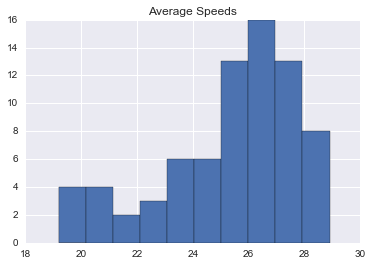

In [16]:
inital_acceleration_period = True
loops = 0
avg_speed_list = []

while loops < 100:
    loops += 1
    if loops > 25:
        inital_acceleration_period = False

    # print_them()

    if inital_acceleration_period == False:
        avg_speed_list.append(calc_averages(avg_speed))
        avg_speed = 0

    check_distance(5)
    update_car_speed()
    update_car_position()
    check_valid_position()
    random_slowdown()

averages_graph(avg_speed_list)


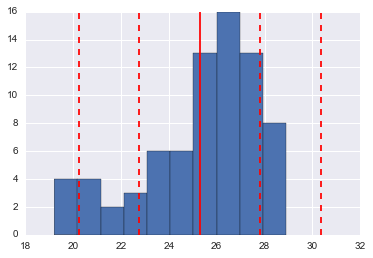

In [17]:
std_dev(avg_speed_list)
